# Plotting Tools

In [5]:
import os
import csv

import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt
from IPython.display import Image 

Plotting Train and validation curves

Displaying result from data/train_val/halfcheetah


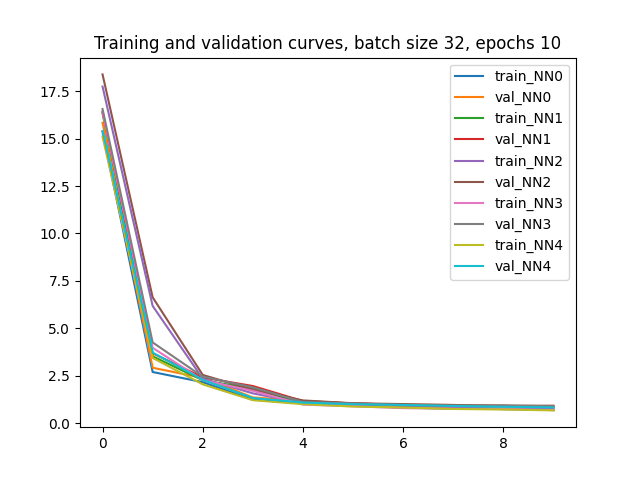

Displaying result from data/train_val/safety


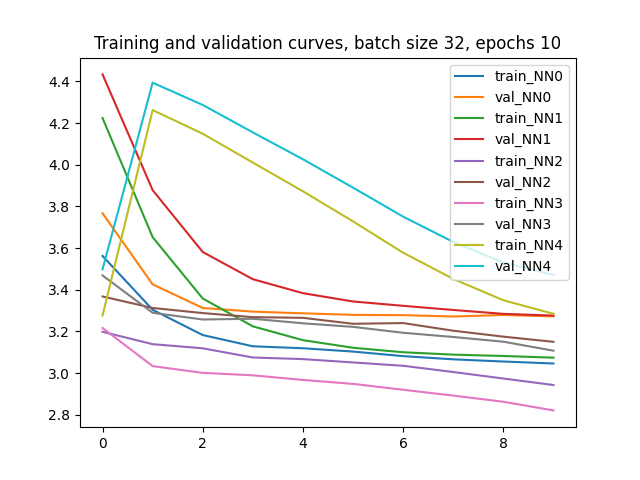

In [2]:
dir = "data/train_val/"
plot_filename = "train_vs_val.png"
for root, dirs, files in os.walk(dir):
    if plot_filename in files:
        print(f"Displaying result from {root}")
        im = Image(filename=os.path.join(root, plot_filename))
        display(im)

Plotting Safety starter agent results on the modified safety goal results, no cost observation, only reward observations.

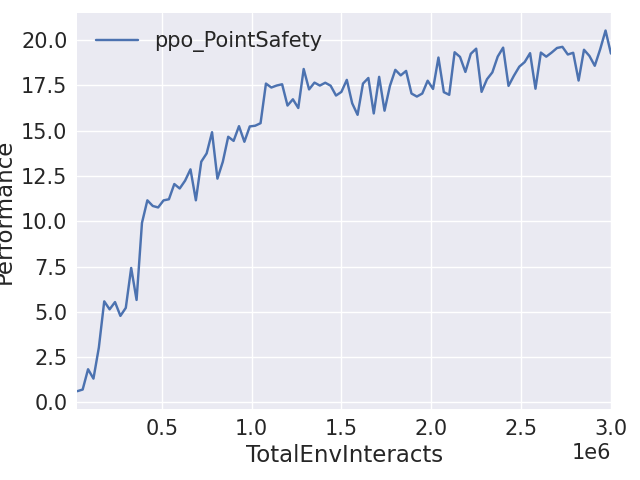

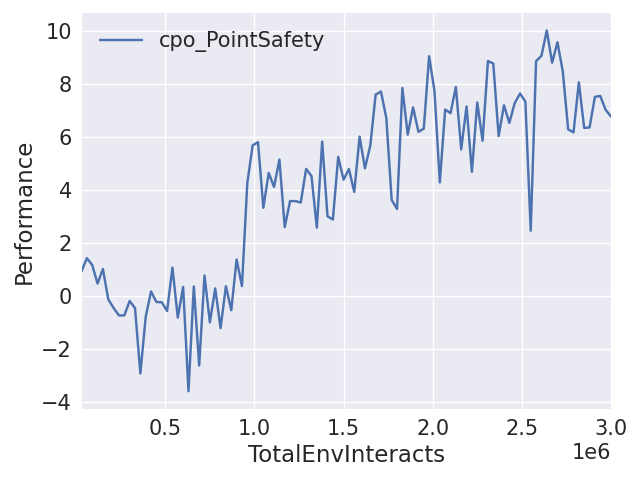

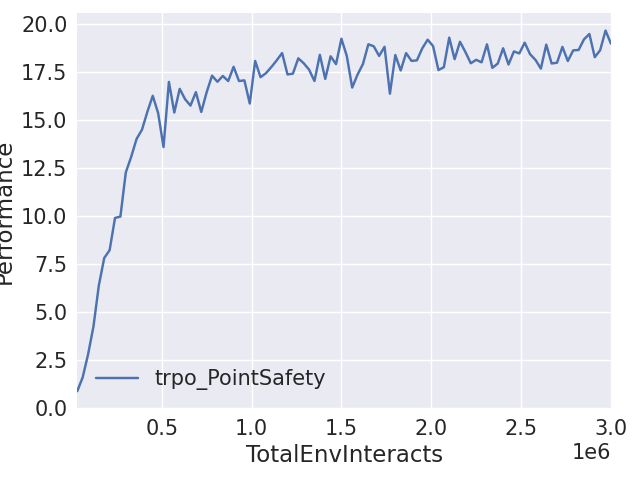

In [8]:
# Plot the Safety start agent results
results = ['ppo', 'cpo', 'trpo']
for i in results:
    im = Image(filename=f"data/{i}_safety_point_goal_1_performance.png")
    display(im)

## Visualizing reward in a single episode
Ideally, should see that later episodes have overall higher reward curves that early episodes.


25 episodes,  each 1000 long


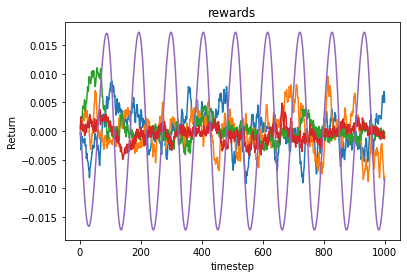

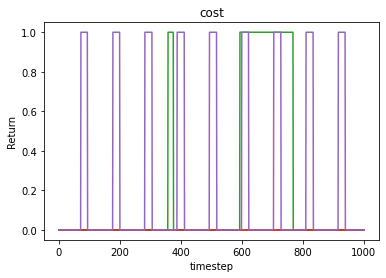

In [3]:
import os
import csv

import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt

# Directory specified in script, not including date+time
log_dir = '/home/juliewang_jsw/handful-of-trials/data'

#safeOpt on Cost+Reward safety point goal 1 env
# filename = '2020-06-07--02:00:24/logs.mat'
# PE-TS with CEM on cost+Reward safety point goal 1 env
# filename = 'orig_pets_2020-06-09--06:17:31/logs.mat'
# PE-TS with CEM on cost+reward safety_point_goal_1, and pretrianing
# filename = '2020-06-10--06:54:10/logs.mat'
# Safetopt on cartpole
# filename = '2020-06-11--06:43:35/logs.mat'
# safeopt on point goal
# filename = '2020-06-11--04:14:42/logs.mat'
# cem on point goal
filename = '2020-06-11--04:05:57/logs.mat'

data = loadmat(os.path.join(log_dir, filename))
avg_reward = np.mean(data['rewards'], axis=0)
N, task_horizon = data['rewards'].shape
print(f"{N} episodes,  each {task_horizon} long")

# Plot rewards and cost over time for a subsequent episdoes
for item in ['rewards', 'cost']:
    if len(data[item]) > 0:
        plt.figure()
        for i in range(0, N, 5):
            plt.plot(np.arange(1, task_horizon+1), data[item][i, :], label=f'{i}th episode')
        plt.title(item)
        plt.xlabel("timestep")
        plt.ylabel("Return")
#         plt.legend()
        plt.show()


## Visualizing return vs. iteration
Ideally want to see the reward increasing as training proceeds

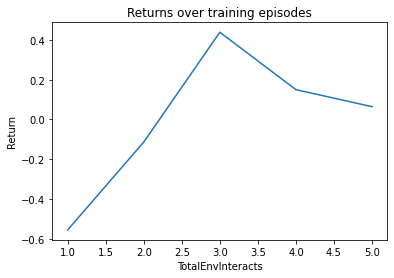

In [4]:
total_reward = data['returns'][0]
episodes = len(total_reward)

plt.figure()
plt.plot(np.arange(1, episodes+1), total_reward)
plt.title("Returns over training episodes")
plt.xlabel("TotalEnvInteracts")
plt.ylabel("Return")
plt.show()